In [2]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Create Data
N = 100
D = 2

# NxD matrix drawn from Gaussian Distribution 
X = np.random.randn(N,D)

X[:50, :] = X[:50, :] - 2*np.ones(D) # Make the first 50 samples to be around mean of -2
X[50:, :] = X[50:, :] + 2*np.ones(D) # Make the last 50 samples to be around mean of +2

t = np.array([0]*50 + [1]*50) # Target variable first 50 for 0 class and last 50 for 1 class

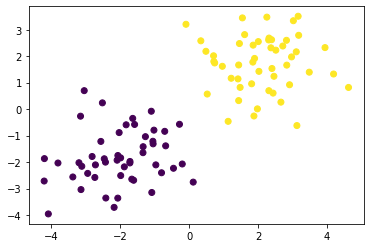

In [4]:
# Plotting Data
plt.scatter(X[:,0], X[:,1], c=t) # First 50
plt.show()

Cost Entropy Function

$$
L = -\sum^N_{i=1}t_i\log(\hat y_i) + (1 - t_i)\log(1 - \hat y_i)
$$

In [5]:
def cost(t,Yhat):
    L = 0
    for i,j in zip(t, Yhat):
        L -= i*np.log(j) + (1-i)*np.log(1-j)
    return L

In [6]:
def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))

In [7]:
w = np.random.randn(D)
z = np.dot(X, w)
Yhat = sigmoid(z)
c = cost(t, Yhat)
print(c)

14.900076105031271


## For a Random weight it gives a higher cost

In [8]:
# Applying Logistic Regression Closed Form Solution since the Distribution is Gaussian and Variance is almmost the same for both classes

In [9]:
# Applying LDA
sigma = np.diag([np.var(X[:50,0]), np.var(X[:50,1])])
W = np.dot(np.array([np.mean(X[50:,0]), np.mean(X[50:,1])]) - np.array([np.mean(X[:50,0]), np.mean(X[:50,1])]), np.linalg.inv(sigma))
print(W)

[3.73505583 3.55301919]


In [10]:
Z = np.dot(X, W)
Yhat_1 = sigmoid(Z)
c1 = cost(t, Yhat_1)
print(c1)

0.1624483533759146


## For an optimized Weight it gives the lowest error

In [11]:
# plot the line
x1 = np.arange(-6,6,1)
x2 = -x1*W[0]/W[1]

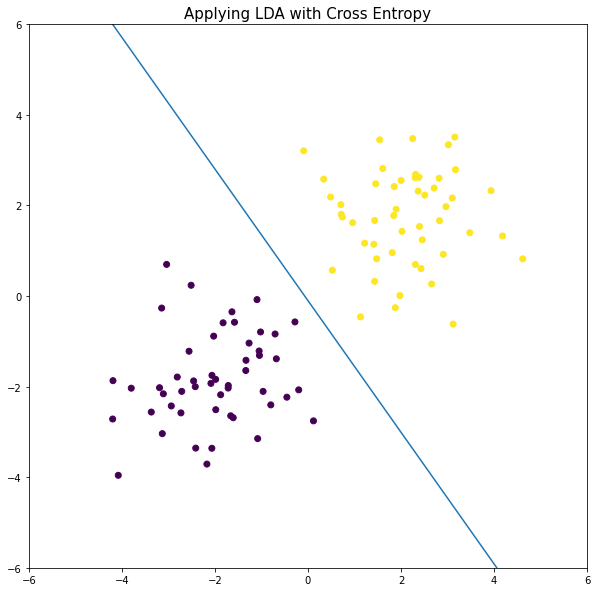

In [27]:
plt.figure(figsize=(10,10))
plt.title("Applying LDA with Cross Entropy", fontsize=15)
plt.scatter(X[:,0], X[:,1], c=t)
plt.plot(x1,x2)
plt.xlim(-6,6)
plt.ylim(-6,6)
plt.show()

# Using Gradient Descent

In [13]:
# Adding the Bias term to Data
ones = np.ones(N)
X = np.vstack((X.T,ones)).T

In [14]:
def update_rule(w, lr, x, error):
    w = w - lr*np.dot(x.T, error)
    return w

In [15]:
def gradientDescent(x, y, w, lr, iterations):
    c = []
    for i in range(iterations):
        Yhat = sigmoid(np.dot(x, w))
        error = Yhat - y
        w = update_rule(w, lr, x, error)
        c.append(cost(y, Yhat))
        
    return c, w

In [25]:
w = np.random.randn(D+1) / np.sqrt(D+1)
lr = 0.01
iterations = 40

c, w = gradientDescent(X,t,w,lr,iterations)

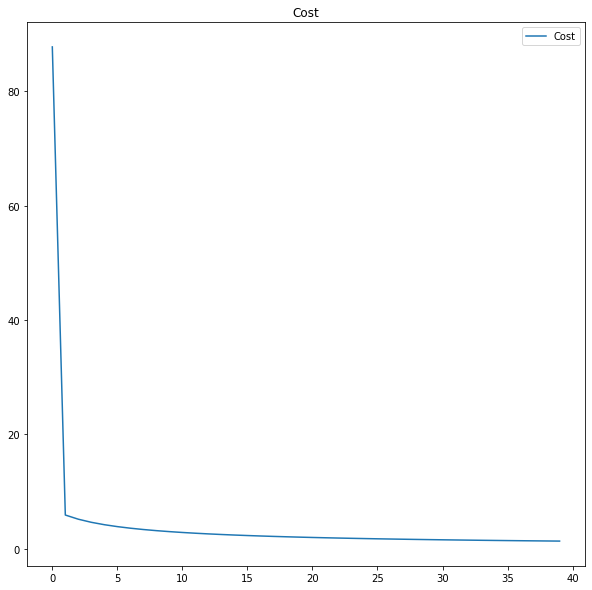

In [26]:
# Cost plot
plt.figure(figsize=(10,10))
plt.title("Cost")
plt.plot(c, label="Cost")
plt.legend()
plt.show()

In [18]:
w

array([2.61770641, 1.80262449, 0.18371098])

In [19]:
# plot the line
x1 = np.arange(-6,6,1)
x2 = (-w[2]-x1*w[0])/w[1]

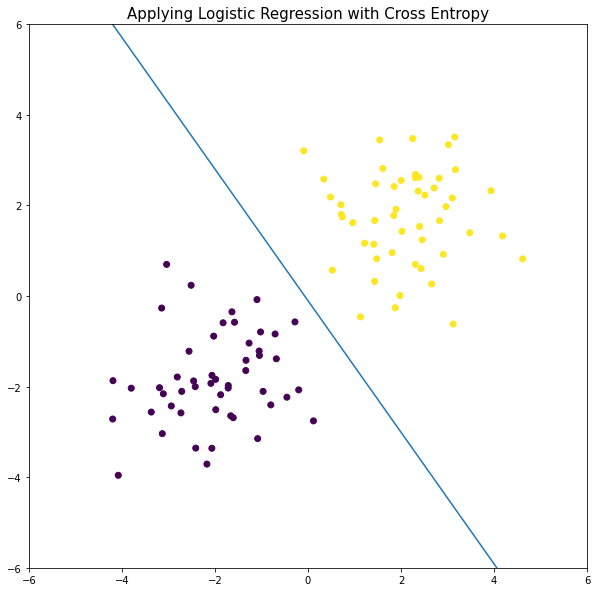

In [28]:
plt.figure(figsize=(10,10))
plt.title("Applying Logistic Regression with Cross Entropy", fontsize=15)
plt.scatter(X[:,0], X[:,1], c=t)
plt.plot(x1,x2)
plt.xlim(-6,6)
plt.ylim(-6,6)
plt.show()

Since the Data(X) is Gaussianly Distributed, it is possible to apply LDA, Otherwise, Logistic Regression is the Best way to go